# [ ADP 실기 21회 머신러닝 ]

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# < 2번 : 규제 회귀 >
- 연속형 독립변수 1개, 종속변수 1개로 구성된 보스턴 집값 데이터셋 
- 원래 기출은 x1 ~ x10 의 이름 알 수 없는 데이터였다고 함

```
1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오.

2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오.  
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산  

3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오. 
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산
```

In [41]:
#보스턴 주택 데이터셋
from sklearn import datasets
housing = datasets.load_boston()

In [42]:
data = pd.DataFrame(housing["data"], columns = housing["feature_names"])
target = pd.DataFrame(housing["target"], columns = ["Target"])           

In [43]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [53]:
target

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## 1-1) 데이터 8:2로 분할하고 선형회귀 적용하시오. (test셋의) 결정계수와 rmse 구하시오.

In [44]:
# 훈련, 테스트 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.2, 
                                                    random_state=0)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso

lr = LinearRegression() 
lr.fit(X_train,y_train)

print("선형회귀 결정계수 : ", lr.score(X_test,y_test)) # 결정계수
print("선형회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))) 

선형회귀 결정계수 :  0.5892223849182507
선형회귀 RMSE :  5.783509315085135


- sklearn의 LinearRegression을 통해 선형회귀모델을 만들고 20% test데이터셋으로 모델을 검증하였다.
- 모델의 정확도는 약 61.5%이며, RMSE 값은 약 5.6 이었다.
- 이는 모델이 예측할 때 실제 값과의 차이가 약 5.6정도 난다는 의미이다. 

## 1-2) 데이터 8:2로 분할하고 릿지 회귀 적용하시오.
### alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 
### 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

#### 규제회귀에서 alpha의 의미
- 디폴트 값은 1이고, 값이 클수록 규제가 강하여 회귀 계수가 0에 근접
- 반면 0에 가까울수록 회귀 계수에 아무런 제약을 하지 않아 선형 회귀와 유사한 결과를 보이게 됨

#### 릿지 회귀
- 선형회귀의 기본 원리를 따르나, 가중치(회귀계수)값을 최대한 작게 만들어, x가 y에 미치는 영향을 최소화하는 제약을 반영한 회귀 모델
- Ridge는 불필요한 변수에 대한 가중치를 0에 가깝게 줄임

### GridsearchCV 이용
- 모델의 매개 변수 그리드를 정의하고, 이 매개 변수 그리드에서 최적의 매개 변수 조합을 찾는 데 사용
- 결정계수가 가장 높을 때의 최적의 매개 변수를 찾을 수 있음
- GridSearch를 사용하면 주어진 매개 변수 조합에 대한 교차 검증 성능을 평가하고, 최적의 매개 변수를 찾을 수 있음

- 참고 : cross_val_score
    - 교차 검증을 수행하여 모델의 성능을 평가하는 데 사용

In [61]:
# 규제회귀에 쓰일 alpha 파라미터 값 정의
alpha = np.arange(0, 1.1, 0.1)

ridge = Ridge() # normalize=True 옵션이 원래 있었음, ADP 버전 X
param_grid = {'alpha':alpha}

ridge_model = GridSearchCV(ridge, param_grid)
ridge_model.fit(X_train,y_train)

# 최적의 alpha 값을 출력
print(ridge_model.best_params_)

# 최적의 alpha 값으로 다시 모델을 학습하고 결정 계수와 RMSE를 계산하여 출력
best_ridge = Ridge(alpha=ridge_model.best_params_['alpha'])
best_ridge.fit(X_train, y_train)
y_pred = best_ridge.predict(X_test)

r2_score = best_ridge.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("릿지회귀 결정계수:", r2_score)
print("릿지회귀 RMSE:", rmse)

{'alpha': 0.0}
릿지회귀 결정계수: 0.5892223849182503
릿지회귀 RMSE: 5.783509315085139


우선, GridSearchCV 함수를 활용하여 alpha를 0.1부터 1까지 적용시켜 최적의 모델을 찾아냈다. 

최적의 모델을 갖는 alpha 값은 0.1이었다. 

alpha값을 조정하여 모델의 학습 정도를 조절할 수 있으며 평가지표로는 R2와 RMSE가 사용된다. 

alpha=0.1의 모델로 test 데이터를 예측하여 검증해본 결과 R2는 약 0.735, RMSE는 약 4.6으로 나타났다. 

## 1-3) 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.
### alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 
### 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br>

#### 라쏘 회귀
- 릿지의 개념과 유사하게 계수값을 0에 가깝게하지만, 실제 중요하지 않은 변수의 계수를 0으로 만들어 불필요한 변수를 제거하는 모델
- LASSO는 불필요한 변수에 대한 가중치를 완전히 0으로 억압하여 변수선택 기능 제공

In [62]:
# 규제회귀에 쓰일 alpha 파라미터 값 정의
alpha = np.arange(0, 1.1, 0.1)

lasso = Lasso() # normalize=True 옵션이 원래 있었음, ADP 버전 X
param_grid = {'alpha':alpha}
lasso_model = GridSearchCV(lasso, param_grid)
lasso_model.fit(X_train,y_train)

# 최적의 alpha 값을 출력
print(lasso_model.best_params_)

# 최적의 alpha 값으로 다시 모델을 학습하고 결정 계수와 RMSE를 계산하여 출력
best_lasso = Lasso(alpha=lasso_model.best_params_['alpha'])
best_lasso.fit(X_train, y_train)
y_pred = best_lasso.predict(X_test)

r2_score = best_lasso.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("라쏘회귀 결정계수:", r2_score)
print("라쏘회귀 RMSE:", rmse)

{'alpha': 0.0}
라쏘회귀 결정계수: 0.5892223849182506
라쏘회귀 RMSE: 5.783509315085136


## 참고 엘라스틱넷(릿지+라쏘)

##### 엘라스틱넷 : 릿지회귀와 라쏘회귀를 절충한 모델 (릿지와 라쏘의 규제항을 더해서 사용)

In [63]:
from sklearn.linear_model import ElasticNet

# 규제회귀에 쓰일 alpha 파라미터 값 정의
alpha = np.arange(0, 1.1, 0.1)

elastic = ElasticNet() # normalize=True 옵션이 원래 있었음, ADP 버전 X
param_grid = {'alpha':alpha}

elastic_model = GridSearchCV(elastic, param_grid)
elastic_model.fit(X_train,y_train)

# 최적의 alpha 값을 출력
print(lasso_model.best_params_)

# 최적의 alpha 값으로 다시 모델을 학습하고 결정 계수와 RMSE를 계산하여 출력
best_elastic = ElasticNet(alpha=elastic_model.best_params_['alpha'])
best_elastic.fit(X_train, y_train)
y_pred = best_elastic.predict(X_test)

r2_score = best_elastic.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("엘라스틱 회귀 결정계수:", r2_score)
print("엘라스틱 회귀 RMSE:", rmse)

{'alpha': 0.0}
엘라스틱 회귀 결정계수: 0.5892223849182506
엘라스틱 회귀 RMSE: 5.783509315085136


---

# < 3번 : 다항회귀 >
아래와 같은 단순 선형 회귀를 3차 다항 회귀까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요.(12점)

 - 원래 데이터 : 독립변수 하나, 종속변수 하나 소규모 데이터

#### 다항회귀(Polynomial Regression)
- 우리가 아는 일반적인 회귀는 독립변수와 종속변수 관계가 일차방정식 형태로 표현된 회귀였음
- 회귀가 독립변수의 단항식이 아닌 2, 3차 방정식과 같은 다항식으로 표현되는 회귀
- Python에서 다항회귀를 바로 구현하는 패키지는 없어서, LinearRegression을 이용해서 유도해야함

In [18]:
import pandas as pd
import numpy as np

# 데이터 불러오기 
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  # 노이즈 포함

# 범위를 나타내는 x축 값이나 테스트 데이터 포인트를 생성하는 데 자주 사용
# 3부터 3까지의 범위를 가지는 등간격으로 나눈 값을 갖는 배열
# 100개의 원소를 가지며, 각 원소는 1차원으로 구성
line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)

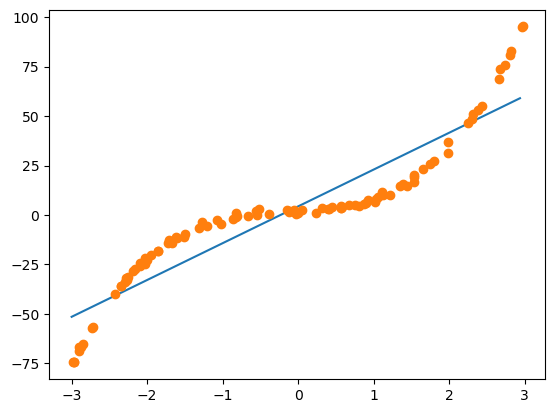

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 선형회귀
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line))
plt.plot(X, y, 'o')

```python
from sklearn.preprocessing import PolynomialFeatures

# 3차 다항회귀 구현, fit_transform으로 한번에 구현 가능
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
```
- PolynomialFeatures 클래스를 통해 피쳐를 다항식 피쳐로 변환
- PolynomialFeatures를 사용하여 주어진 특성을 다항식 형태로 변환한 후, 변환된 특성을 사용하여 선형 회귀 모델을 학습
- 아래 코드는 전체적인 과정을 보여주기 위해서 따로따로 적용

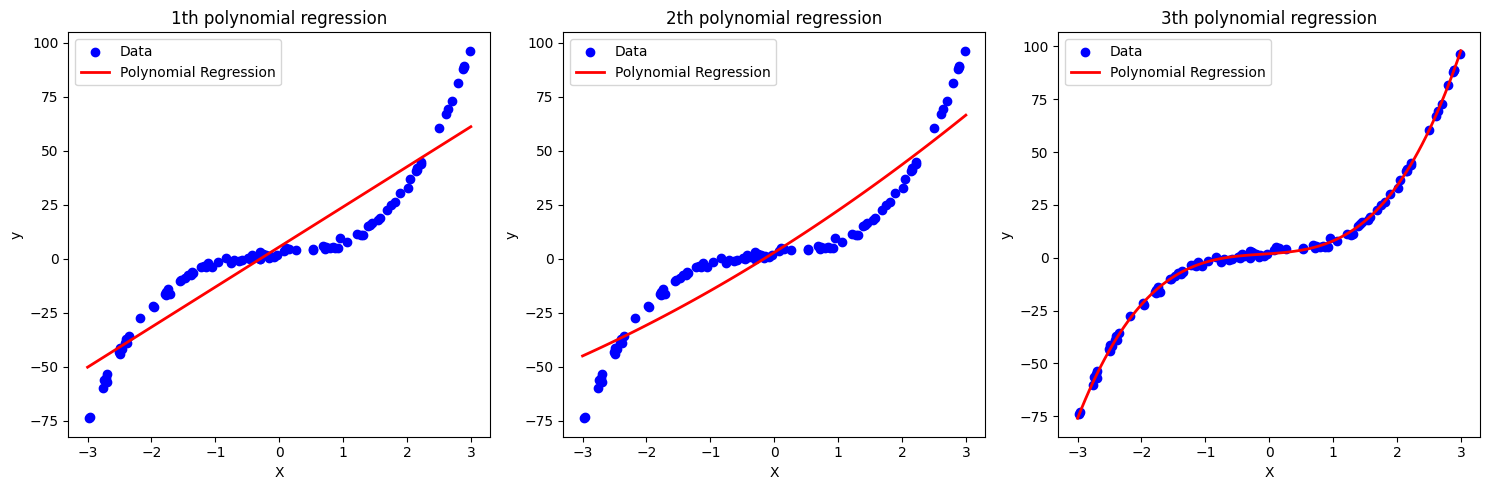

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 3 * X**3 + X**2 + 2*X + 2 + np.random.randn(m, 1)  # 노이즈 포함

# 차수 설정
degrees = [1, 2, 3]

# for 문을 사용하여 다항 회귀 계수 구하기 및 그래프 그리기
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    # 다항 회귀 적용
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    # 선형 회귀 모델 훈련
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)

    # 그래프 그리기
    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, c='b', label='Data')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'{degree}th polynomial regression')

    # 선 그리기
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg.predict(X_new_poly)
    plt.plot(X_new, y_new, 'r-', linewidth=2, label='Polynomial Regression')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


---

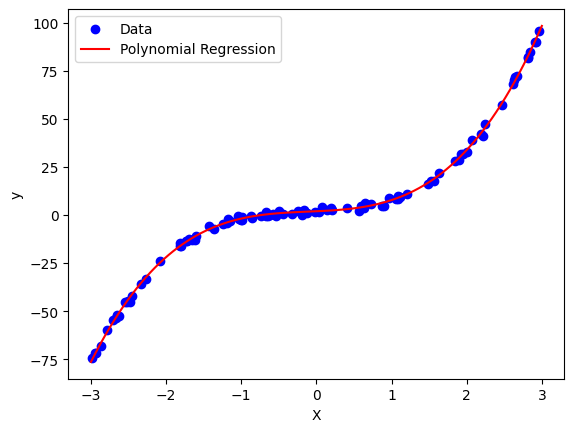

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 3 * X**3 + X**2 + 2*X + 2 + np.random.randn(m, 1)  # 노이즈 포함

# 다항 회귀 적용
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# 모델 학습
reg = LinearRegression()
reg.fit(X_poly, y)

# 데이터 포인트 스캐터 플롯
plt.scatter(X, y, label='Data', color='blue')

# 3차 다항식 기울기 선 그리기
line = np.linspace(-3, 3, 100).reshape(-1, 1)
line_poly = poly.transform(line)
y_pred = reg.predict(line_poly)
plt.plot(line, y_pred, label='Polynomial Regression', color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [36]:
reg.coef_ # 첫번째가 x항, 두번째가 x제곱항, 세번째가 x 세제곱항

array([[2.23063567, 1.01709803, 2.96223891]])

In [60]:
reg.intercept_

array([1.91425899])

[해당 모형의 3차 회귀식]

y=2.96223891*x^3 + 1.01709803 *x^2 + 2.23063567 * x + 1.91425899